<a href="https://colab.research.google.com/github/RoopakCS/basic-nn-model/blob/main/nntraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Roopak C S - 212223220088

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('MyMLData').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})

In [ ]:
dataset1.head()

,Input,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
#Assigning input column to X and output column to y
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [ ]:
#Splitting testing and training data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
#Pre processing
Scaler = MinMaxScaler()

In [ ]:
#Scaling the input for training
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
#Transforming the scaled input
X_train1 = Scaler.transform(X_train)

In [ ]:
#Creating the model
ai_brain=Sequential([
    Dense(units = 4, activation = 'relu',input_shape = [1]),
    Dense(units = 3, activation = 'relu'),
    Dense(units = 1)
])

In [ ]:
#Compiling the model
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [ ]:
#Fitting the model
ai_brain.fit(X_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 13043.9121
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 13041.1055
Epoch 3/2000
1/1 [==============================] - 0s 12ms/step - loss: 13039.1318
Epoch 4/2000
1/1 [==============================] - 0s 12ms/step - loss: 13037.5322
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 13036.1465
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 13034.9365
Epoch 7/2000
1/1 [==============================] - 0s 13ms/step - loss: 13033.8174
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 13032.7822
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 13031.8486
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 13030.9619
Epoch 11/2000
1/1 [==============================] - 0s 9ms/step - loss: 13030.1006
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 13029.26

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

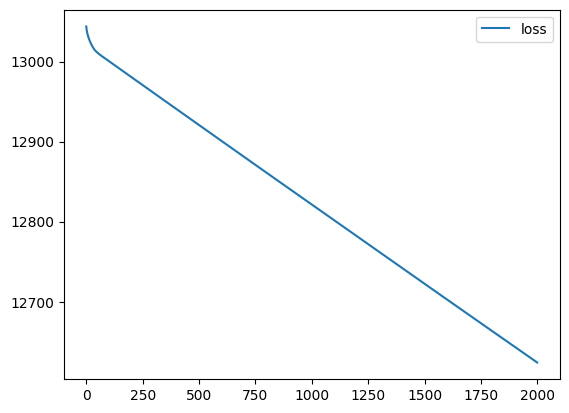

In [ ]:
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

In [ ]:
ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 208ms/step - loss: 16953.2227


16953.22265625

In [ ]:
X_n1 = [[30]]

In [ ]:
X_n1_1 = Scaler.transform(X_n1)

In [ ]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 142ms/step


array([[1.9547771]], dtype=float32)